In [4]:
import math
import numpy as np
from matplotlib import pyplot
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Point source flow
The pressure field for a point source at $\mathbf{x}_s$ flow can be written as:

$
p\left( \mathbf{x}_i \right) =\frac{q_s}{2\pi}\ln \frac{1}{r\left( \mathbf{x}_i,\mathbf{x}_s \right)},r\left( \mathbf{x}_i,\mathbf{x}_s \right) =\sqrt{\left( x_i-x_s \right) ^2+\left( y_i-y_s \right) ^2}
$

The pressure derivative are:

$
\frac{\partial p}{\partial x}=\frac{q_s}{2\pi r}\frac{x_i-x_s}{r}
\\
\frac{\partial p}{\partial y}=\frac{q_s}{2\pi r}\frac{y_i-y_s}{r}
$

The corrsponding Darcy's velocity field can be derived by taking derivative on x and y direction as:

$
u\left( \mathbf{x}_i \right) =-\frac{k}{u}\frac{\partial p}{\partial x}=-\frac{k}{u}\frac{q_s}{2\pi r}\frac{x_i-x_s}{r}
\\
v\left( \mathbf{x}_i \right) =-\frac{k}{u}\frac{\partial p}{\partial y}=-\frac{k}{u}\frac{q_s}{2\pi r}\frac{y_i-y_s}{r}
$


In [5]:
N = 50                                # number of points in each direction
x_start, x_end = -2.0, 2.0            # boundaries in the x-direction
y_start, y_end = -2.0, 2.0            # boundaries in the y-direction
x = np.linspace(x_start, x_end, N)    # creates a 1D-array with the x-coordinates
y = np.linspace(y_start, y_end, N)    # creates a 1D-array with the y-coordinates


X, Y = np.meshgrid(x, y)              # generates a mesh grid

In [6]:
k=0.5
nu=1.0
q_s = 5.0                                  # source strength
x_source, y_source = -0.0, 0.0             # location of the source

# compute the velocity field on the mesh grid
p_source = (q_s / (2 * math.pi) * np.log((X - x_source)**2 + (Y - y_source)**2))
u_source = -k/nu*(q_s / (2 * math.pi) *
            (X - x_source) / ((X - x_source)**2 + (Y - y_source)**2))
v_source = -k/nu*(q_s / (2 * math.pi) *
            (Y - y_source) / ((X - x_source)**2 + (Y - y_source)**2))

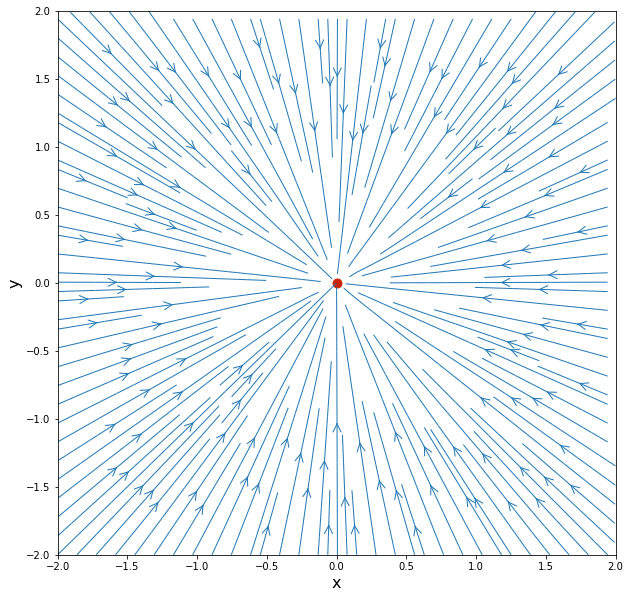

In [7]:
# plot the streamlines
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_source, v_source,
                  density=2, linewidth=1, arrowsize=2, arrowstyle='->')
pyplot.scatter(x_source, y_source,
               color='#CD2305', s=80, marker='o');

C:\Users\PoreSimPC\Anaconda3\lib\site-packages\matplotlib\contour.py:942: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


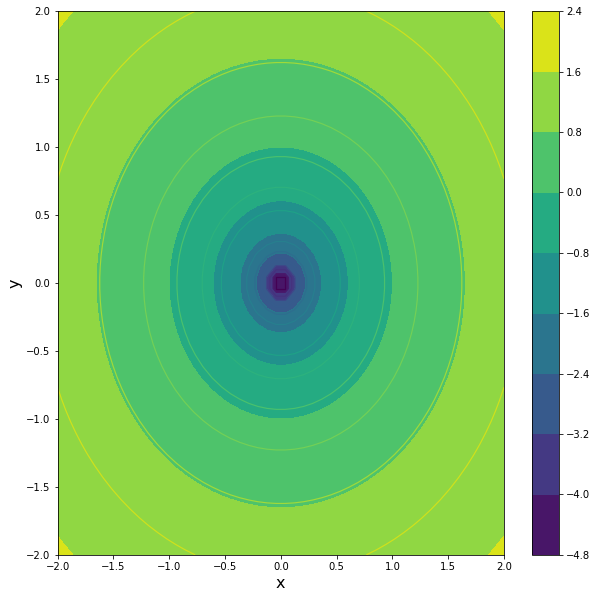

In [8]:
# plot the streamlines
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
fig=pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
level = np.linspace(np.min(p_source), np.max(p_source), 15, endpoint=True)
pyplot.contour(X, Y, p_source,level,linewidths=1.2)
im=pyplot.contourf(X, Y, p_source,linewidths=1.2)
fig.colorbar(im)  # draw colorbar

### Similarly the derivation for velocity in our paper

The BIE in term of pressure is:

$
-\frac{kb_f}{\mu}\left( c\left( \mathbf{x}_i \right) p\left( \mathbf{x}_i \right) +\int_{\varGamma}{p\left( \mathbf{x} \right) \frac{\partial w\left( \mathbf{x}_i,\mathbf{x} \right)}{\partial \mathbf{n}}d\varGamma} \right) =-\frac{kb_f}{\mu}\int_{\varGamma}{\frac{\partial p}{\partial \mathbf{n}}\left( \mathbf{x} \right) w\left( \mathbf{x}_i,\mathbf{x} \right) d\varGamma}
\\
-\sum_{t\in T}{\int_t{q_t\left( \mathbf{x} \right) w\left( \mathbf{x}_i,\mathbf{x} \right) dt}}-\sum_{s\in S}{q_s}w\left( \mathbf{x}_i,\mathbf{x}_s \right) 
\\
$

The pressure gradient for above BIE can be derived by taking derivative on x and y direction as:

$
-\frac{kb_f}{\mu}\left( c\left( \mathbf{x}_i \right) \frac{\partial p\left( \mathbf{x}_i \right)}{\partial x}+\int_{\varGamma}{p\left( \mathbf{x} \right) \frac{\partial}{\partial x}\left( \frac{\partial w\left( \mathbf{x}_i,\mathbf{x} \right)}{\partial \mathbf{n}} \right) d\varGamma} \right) =-\frac{kb_f}{\mu}\int_{\varGamma}{\frac{\partial p}{\partial \mathbf{n}}\left( \mathbf{x} \right) \frac{\partial w\left( \mathbf{x}_i,\mathbf{x} \right)}{\partial x}d\varGamma}
\\
-\sum_{t\in T}{\int_t{q_t\left( \mathbf{x} \right) \frac{\partial w\left( \mathbf{x}_i,\mathbf{x} \right)}{\partial x}dt}}-\sum_{s\in S}{q_s}\frac{\partial w\left( \mathbf{x}_i,\mathbf{x}_s \right)}{\partial x}
\\
-\frac{kb_f}{\mu}\left( c\left( \mathbf{x}_i \right) \frac{\partial p\left( \mathbf{x}_i \right)}{\partial y}+\int_{\varGamma}{p\left( \mathbf{x} \right) \frac{\partial}{\partial y}\left( \frac{\partial w\left( \mathbf{x}_i,\mathbf{x} \right)}{\partial \mathbf{n}} \right) d\varGamma} \right) =-\frac{kb_f}{\mu}\int_{\varGamma}{\frac{\partial p}{\partial \mathbf{n}}\left( \mathbf{x} \right) \frac{\partial w\left( \mathbf{x}_i,\mathbf{x} \right)}{\partial y}d\varGamma}
\\
-\sum_{t\in T}{\int_t{q_t\left( \mathbf{x} \right) \frac{\partial w\left( \mathbf{x}_i,\mathbf{x} \right)}{\partial y}dt}}-\sum_{s\in S}{q_s}\frac{\partial w\left( \mathbf{x}_i,\mathbf{x}_s \right)}{\partial y}
$

Based on Darcy's law, the Darcy's velocity are:

$
u_x=-\frac{k}{\mu}\frac{\partial p\left( \mathbf{x}_i \right)}{\partial x},u_y=-\frac{k}{\mu}\frac{\partial p\left( \mathbf{x}_i \right)}{\partial y}
$

Thus, the final BIE for velocity are:

$
c\left( \mathbf{x}_i \right) u_x\left( \mathbf{x}_i \right) b_f-\frac{kb_f}{\mu}\int_{\varGamma}{p\left( \mathbf{x} \right) \frac{\partial}{\partial x}\left( \frac{\partial w\left( \mathbf{x}_i,\mathbf{x} \right)}{\partial \mathbf{n}} \right) d\varGamma}=-\frac{kb_f}{\mu}\int_{\varGamma}{\frac{\partial p}{\partial \mathbf{n}}\left( \mathbf{x} \right) \frac{\partial w\left( \mathbf{x}_i,\mathbf{x} \right)}{\partial x}d\varGamma}
\\
-\int_t{q_t\left( \mathbf{x} \right) \frac{\partial w\left( \mathbf{x}_i,\mathbf{x} \right)}{\partial x}dt}-q_s\left( \mathbf{x} \right) \frac{\partial w\left( \mathbf{x}_i,\mathbf{x} \right)}{\partial x}
\\
c\left( \mathbf{x}_i \right) u_y\left( \mathbf{x}_i \right) b_f-\frac{kb_f}{\mu}\int_{\varGamma}{p\left( \mathbf{x} \right) \frac{\partial}{\partial y}\left( \frac{\partial w\left( \mathbf{x}_i,\mathbf{x} \right)}{\partial \mathbf{n}} \right) d\varGamma}=-\frac{kb_f}{\mu}\int_{\varGamma}{\frac{\partial p}{\partial \mathbf{n}}\left( \mathbf{x} \right) \frac{\partial w\left( \mathbf{x}_i,\mathbf{x} \right)}{\partial y}d\varGamma}
\\
-\int_t{q_t\left( \mathbf{x} \right) \frac{\partial w\left( \mathbf{x}_i,\mathbf{x} \right)}{\partial y}dt}-q_s\left( \mathbf{x} \right) \frac{\partial w\left( \mathbf{x}_i,\mathbf{x} \right)}{\partial y}
$